In [1]:
# Title : Supply chain management : EDA

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'model.log',
                    filemode = 'w',
                    format = '%(ascitime)s - %(levelname)s - %(message)s',
                    force = True
                    )

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('SCM.csv')
df.sample(frac = 1)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
22139,WH_122139,EID_72139,Rural,Mid,West,Zone 3,5,0,4,3771,Rented,66,0,0,0,97,30.0,1998.0,24,0,C,2,19,30102
5814,WH_105814,EID_55814,Rural,Small,North,Zone 1,0,0,2,5134,Rented,22,0,0,0,185,42.0,NaN,18,0,B,2,31,23102
18473,WH_118473,EID_68473,Rural,Large,North,Zone 6,4,0,4,4440,Company Owned,29,0,0,1,114,28.0,1999.0,31,1,B,3,6,38075
13562,WH_113562,EID_63562,Rural,Mid,West,Zone 4,5,0,4,4539,Company Owned,49,0,0,1,87,21.0,2001.0,32,0,A,3,26,43095
16991,WH_116991,EID_66991,Rural,Mid,South,Zone 2,5,0,2,5421,Company Owned,17,0,0,1,212,27.0,1998.0,24,0,C,5,32,30126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16736,WH_116736,EID_66736,Urban,Large,West,Zone 6,8,1,4,3849,Rented,68,0,0,0,222,34.0,2004.0,24,0,B,3,6,29139
11475,WH_111475,EID_61475,Rural,Mid,West,Zone 4,8,1,4,3939,Company Owned,50,1,0,1,74,33.0,2007.0,15,0,B,6,26,18110
10848,WH_110848,EID_60848,Rural,Mid,North,Zone 4,1,1,3,8411,Rented,37,0,0,1,159,25.0,NaN,34,1,B+,4,26,41113
10199,WH_110199,EID_60199,Rural,Large,West,Zone 5,5,0,4,4873,Rented,68,0,0,0,199,17.0,2004.0,38,0,B+,5,5,48115


In [4]:
# Checking the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

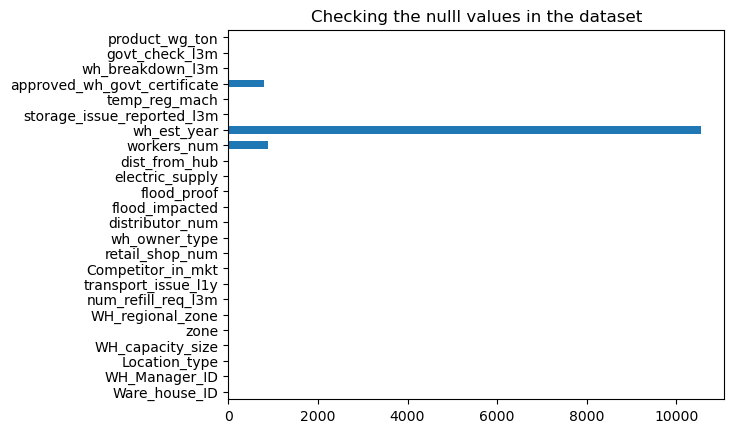

In [5]:
df.isnull().sum().plot(kind = 'barh')
plt.title('Checking the nulll values in the dataset')
plt.show()

In [6]:
# Checking the percentage of missing value
df.isnull().sum() / len(df) * 100

Ware_house_ID                    0.000000
WH_Manager_ID                    0.000000
Location_type                    0.000000
WH_capacity_size                 0.000000
zone                             0.000000
WH_regional_zone                 0.000000
num_refill_req_l3m               0.000000
transport_issue_l1y              0.000000
Competitor_in_mkt                0.000000
retail_shop_num                  0.000000
wh_owner_type                    0.000000
distributor_num                  0.000000
flood_impacted                   0.000000
flood_proof                      0.000000
electric_supply                  0.000000
dist_from_hub                    0.000000
workers_num                      3.959368
wh_est_year                     47.607223
storage_issue_reported_l3m       0.000000
temp_reg_mach                    0.000000
approved_wh_govt_certificate     3.634312
wh_breakdown_l3m                 0.000000
govt_check_l3m                   0.000000
product_wg_ton                   0

In [7]:
# Checking the wh_est_year column
df['wh_est_year'].median(), df['wh_est_year'].mean()

(2009.0, 2009.4012063765617)

<Axes: ylabel='wh_est_year'>

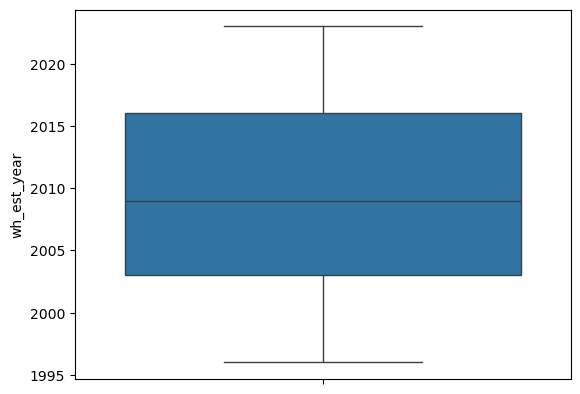

In [8]:
sns.boxplot(data = df['wh_est_year'])

<Axes: xlabel='wh_est_year', ylabel='Density'>

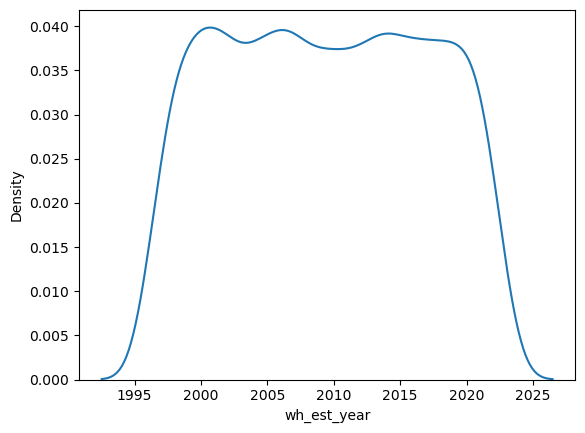

In [9]:
sns.kdeplot(data = df['wh_est_year'])

In [10]:
df['wh_est_year'] = df['wh_est_year'].fillna(2009.401)

<Axes: xlabel='wh_est_year', ylabel='Density'>

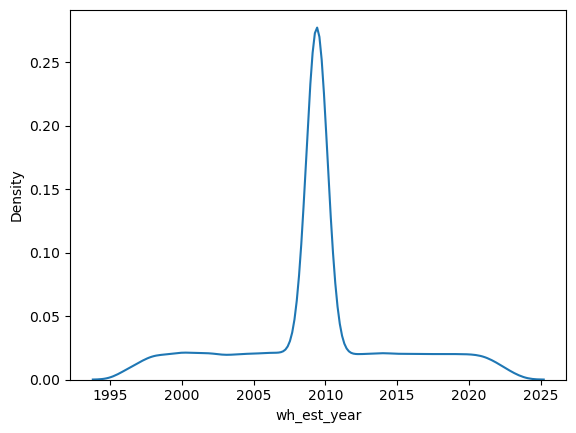

In [11]:
sns.kdeplot(data = df['wh_est_year'])

In [12]:
# Dropping Columns which is having missing values more than 15%
df = df.drop(columns = 'wh_est_year')

In [16]:
# Filling missing data
# df['workers_num].median():28
df['workers_num'] = df['workers_num'].fillna(28)

# df['approved_wh_govt_certificate'].value_counts():'C'
df['approved_wh_govt_certificate'] = df['approved_wh_govt_certificate'].fillna('C')



In [17]:
# Segregate numerical and categorical columns

numerical_col =df.select_dtypes(exclude = 'object')
categorical_col =df.select_dtypes(include = 'object')

In [32]:
# Exploratery Data Analysis
from collections import OrderedDict

stats = []
for i in numerical_col.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Count': df[i].count(),
        'Mean': df[i].mean(),
        'Median': df[i].median(),
        'Mode': df[i].mode()[0] if not df[i].mode().empty else None,
        'Min': df[i].min(),
        'Max': df[i].max(),
        'Std': df[i].std(),
        'Q3': df[i].quantile(0.75),
        'Q1': df[i].quantile(0.25),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25),
        'Kurtosis': df[i].kurt(),
        'Skewness': df[i].skew(),
        'Range': df[i].max() - df[i].min()
    })
    stats.append(numerical_stats)

report = pd.DataFrame(stats)



report

,Feature,Count,Mean,Median,Mode,Min,Max,Std,Q3,Q1,IQR,Kurtosis,Skewness,Range
0,num_refill_req_l3m,22150,4.097020,4.0,5.0,0.0,8.0,2.606289,6.0,2.00,4.00,-1.218193,-0.081390,8.0
1,transport_issue_l1y,22150,0.777201,0.0,0.0,0.0,5.0,1.201747,1.0,0.00,1.00,1.820683,1.605424,5.0
2,Competitor_in_mkt,22150,3.103928,3.0,2.0,0.0,12.0,1.142886,4.0,2.00,2.00,1.798511,0.985102,12.0
3,retail_shop_num,22150,4983.115711,4859.0,4808.0,1821.0,11008.0,1050.634225,5499.0,4309.25,1189.75,1.846915,0.905324,9187.0
4,distributor_num,22150,42.386998,42.0,21.0,15.0,70.0,16.057730,56.0,29.00,27.00,-1.187118,0.017210,55.0
5,flood_impacted,22150,0.098691,0.0,0.0,0.0,1.0,0.298253,0.0,0.00,0.00,5.243614,2.691308,1.0
6,flood_proof,22150,0.054492,0.0,0.0,0.0,1.0,0.226991,0.0,0.00,0.00,13.412215,3.925685,1.0
7,electric_supply,22150,0.656072,1.0,1.0,0.0,1.0,0.475028,1.0,0.00,1.00,-1.568273,-0.657167,1.0
8,dist_from_hub,22150,163.613725,164.0,204.0,55.0,271.0,62.660709,218.0,109.00,109.00,-1.200679,-0.009042,216.0
9,workers_num,22150,28.899323,28.0,28.0,10.0,98.0,7.688749,33.0,24.00,9.00,3.558098,1.077243,88.0


In [33]:
df

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,5030,Rented,46,0,0,1,203,28.0,22,1,A+,2,4,29138
22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,3,1,3,4320,Rented,60,0,0,0,170,28.0,26,0,C,5,9,33108
22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,5268,Company Owned,64,0,0,0,99,22.0,20,0,B+,6,4,24072
22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,6,2,4,4378,Rented,32,0,0,0,220,17.0,13,0,B,3,28,15055
